# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
import pandas as pd 

boston_data = boston['data']
boston_col = boston['feature_names']
boston_df = pd.DataFrame(data=boston_data, columns=boston_col)
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [ ]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [ ]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
boston_targuet = pd.DataFrame(data=boston['target'])
boston_targuet.describe()


,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [ ]:
#  print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']        # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

In [ ]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

## Respuestas

1- El conjunto de datos contiene información obtenida por "U.S Census Service concerning housing in the area of Boston Mass". Esta información hace referencia diferentes atributos medidos para las viviendas ocupadas en diferentes zonas del área de Boston, tales como , numero de habitaciones, valor del crimen per capita, valor de impuestos, proporcion de personas de color, etc.



2- En la descripción del data set indica que el atributo la variable objetivo es MEDV: Mediana del valor de viviendas en propiedad en miles de dólares.

3- Los trece atributos restantes del data set.

4- Consideramos que los valores mas determinantes para poder realizar la predicción son los siguientes atributos:
  * RM : Número de habitaciones por vivienda.
  * DIS : Distancia de a las 5 áreas centrales. Zonas empresarias. 
  * LSTAT: Porcentaje de población de “estatus de bajo nivel”.

5- A priori podemos observar un problema ético, dado que una de las medidas tomas hace referencia a la proporción de personas de color por vivienda habitada dando a entender el color de piel es un factor que influye en el valor de un vivienda.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

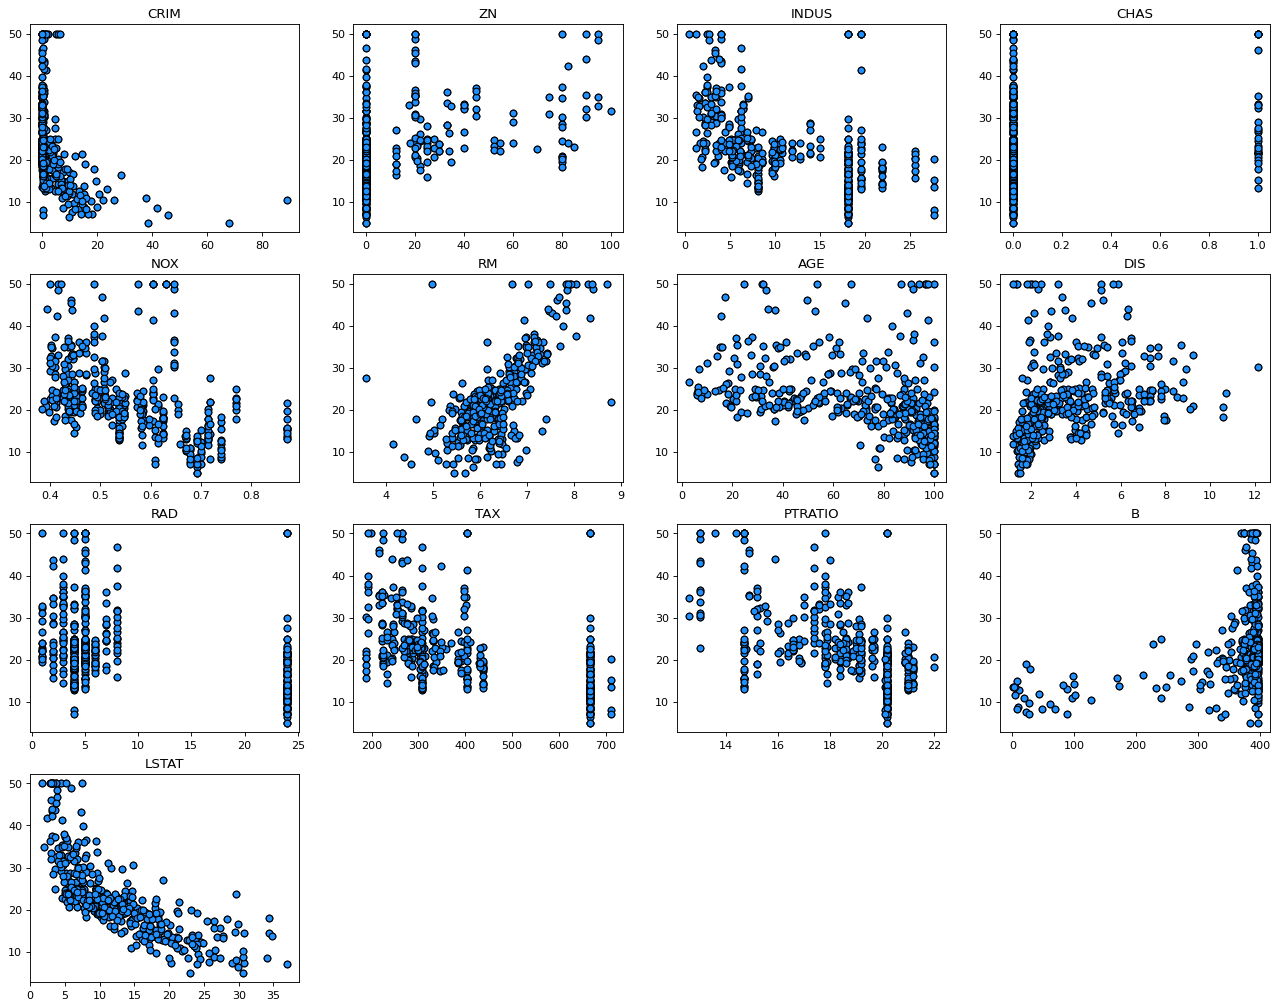

In [ ]:
# 1. Resolver acá. Ayuda/ejemplo:
plt.figure(figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

i=0
for feature in boston['feature_names']:
  i+=1
  plt.subplot(5,4,i)
  selector = (boston['feature_names'] == feature)
  plt.scatter(X_train[:, selector], y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
  plt.scatter(X_train[:, selector], y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
  plt.title(feature)
  
plt.show()

3.  Mediante el análisis de los gráficos más informativos para nuestra prediccion son: 
  * 1- LSTAT: Se puede observar una clara relación en el valor de la vivienda  con respecto a la propoción de familias de clase baja. A menor proporción  mayor valor de la vivienda.
  * 2- RM: Se puede observar como influye el número de habitaciones sobre el precio de la vivienda. A mayor número de habitaciones mayor valor de la vivienda.  
  * 4- AGE: Se puede observar que a mayor antigüedad de la vivienda disminuye el valor de las mayorias de las viviendas.


## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

## Respuesta
#### 1- Seleccion del atributo LSTAT.



In [ ]:
# 1. Resolver acá. Ayuda:
feature = 'LSTAT'  # selecciono el atributo 'LSTAT'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector].flatten()
X_test_f = X_test[:, selector].flatten()
X_train_f.shape, X_test_f.shape


((404,), (102,))

In [ ]:
# feature = 'LSTAT'  # selecciono el atributo 'LSTAT'
y_train_f = y_train[:]
y_test_f = y_test[:]
y_train_f.shape, y_test_f.shape
# y_test_f

((404,), (102,))

#### 2. Instanciación y entrenamiento.

In [ ]:
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

In [ ]:
w = linear_least_squares(X_train_f, y_train_f)
w

array([-0.95648761, 34.76519272])

#### 3- Predicción y evaluación.

In [ ]:
y_train_pred = f(X_train_f, w)
y_test_pred = f(X_test_f, w)

In [ ]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train_f, y_train_pred)
test_error = mean_squared_error(y_test_f, y_test_pred)
print(f'Train error: {train_error:0.3}')
print(f'Test error: {test_error:0.3}')

Train error: 36.5
Test error: 46.3


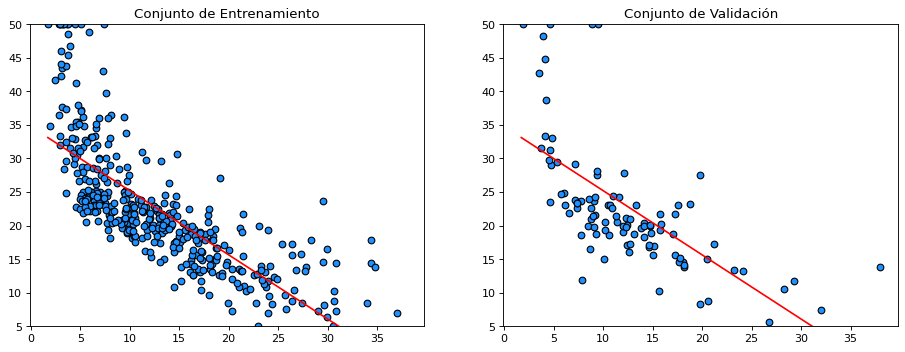

In [ ]:
# 4. Graficar acá. Ayuda:
plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train_f, X_test_f])
X_range_stop = np.max(np.r_[X_train_f, X_test_f])
y_range_start = np.min(np.r_[y_train_f, y_test_f])
y_range_stop = np.max(np.r_[y_train_f, y_test_f])
X_linspace = np.linspace(X_range_start, X_range_stop, 200)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_f, y_train_f, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, f(X_linspace,w), color="red", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_test_f, y_test_f, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, f(X_linspace,w), color="red", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

# plt.plot(X_test_f, y_test_pred, color="red", label="model")
# plt.scatter(X_test_f, y_test_f, facecolor="white", edgecolor="k", label="test")
# plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
# plt.title(feature)
# plt.legend()
# plt.show()

#### 5- Se puede observar un correcto ajuste del modelo al atributo. Sin embargo, para este caso en particular, el modelo de regresión lineal no parece ser el más adecuado dado que en los extremos se acentúa la diferencia entre los valores que predice y lo los del test.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [ ]:
# 1. Resolver acá.
X_train_rp = X_train_f.reshape(-1, 1)
X_test_rp = X_test_f.reshape(-1, 1)
y_train_rp = y_train_f.reshape(-1, 1)
y_test_rp = y_test_f.reshape(-1, 1)
y_train.shape, y_test.shape


((404,), (102,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_rp, y_train_rp)
    
    # predict:
    y_train_pred = model.predict(X_train_rp)
    y_test_pred = model.predict(X_test_rp)
    
    # evaluate:
    train_error = mean_squared_error(y_train_rp, y_train_pred)
    test_error = mean_squared_error(y_test_rp, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [ ]:
test_errors

[81.58231743908229,
 46.336305360025946,
 38.8468686617072,
 37.22424226843414,
 34.7048685980719,
 34.83470817648436,
 34.32620684168292,
 34.261114559022666,
 36.41559279319094,
 34.857257984801024,
 41.66724309074405,
 39.49116932643484,
 76.9847519736735]

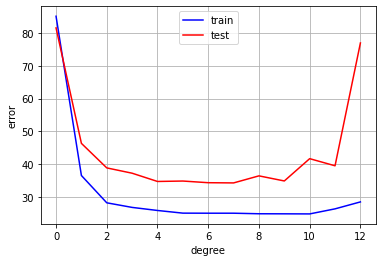

In [ ]:
# 2. Graficar curvas de error acá.
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.grid()
plt.show()

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.
# train:
degree = 7
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_rp, y_train_rp)
   # predict:
y_train_pred = model.predict(X_train_rp)
y_test_pred = model.predict(X_test_rp)
    # evaluate:
train_error = mean_squared_error(y_train_rp, y_train_pred)
test_error = mean_squared_error(y_test_rp, y_test_pred)

print("train_error:", train_error)
print("test_error:", test_error)

train_error: 25.01353496965471
test_error: 34.261114559022666


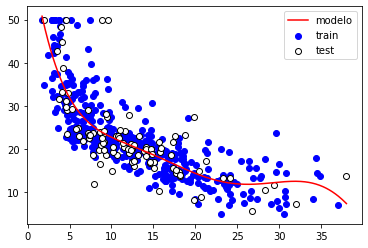

In [ ]:
plt.scatter(X_train_rp, y_train_rp, color="blue", label="train")
plt.scatter(X_test_rp, y_test_rp, color="white", edgecolor="k", label="test")
x_start = min(np.min(X_train_rp), np.min(X_test_rp))
x_end = max(np.max(X_train_rp), np.max(X_test_rp))
x = np.linspace(x_start, x_end, 500).reshape(-1, 1)
plt.plot(x, model.predict(x), color="red", label="modelo")
plt.legend()
plt.show()

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [ ]:
y_train_fs = y_train_f.reshape(-1, 1)
y_test_fs = y_test_f.reshape(-1, 1)
y_train_fs.shape, y_test_fs.shape

((404, 1), (102, 1))

In [ ]:
# 2. Resolver acá.
train_errors = []
test_errors = []
degrees = [1, 2, 3, 4, 5, 6, 7] #con el cero no funciona
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train_fs)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train_fs, y_train_pred)
    test_error = mean_squared_error(y_test_fs, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [ ]:
test_errors

[37.383105638779945,
 28.14497186312392,
 28.567166435382816,
 33.99923338615729,
 34.2014052676771,
 34.92501288121473,
 158.2408416301942]

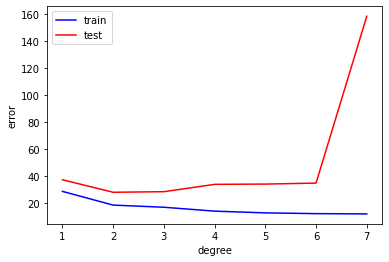

In [ ]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

In [ ]:
# train:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_fs, y_train_fs)

# predict:
y_train_pred = model.predict(X_train_fs)
y_test_pred = model.predict(X_test_fs)
    # evaluate:
train_error = mean_squared_error(y_train_fs, y_train_pred)
test_error = mean_squared_error(y_test_fs, y_test_pred)

train_error, test_error

(18.659453833139377, 28.14497186312392)

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


In [ ]:
#7 y 8 usando todos los atributos y ridge

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

train_errors = []
test_errors = []
min_ecm = [100,0,0] #variable utilizada para guardar el grado y alpha del modelo con menor ECM
degrees = [0,1,2,3,4]
als = [1e-4, 1e-3, 1e-2, 0.1, 69, 70, 71]

for degree in [1,2,3]:
  for al in als:
    # train:
    model = make_pipeline(PolynomialFeatures(degree=degree), Ridge(alpha=al))
    model.fit(X_train, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

    if (min_ecm[0] > test_error):
      min_ecm[0]=test_error
      min_ecm[1]=degree
      min_ecm[2]=al

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.56944e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.56944e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.

In [ ]:
print(f'Test error: {min_ecm[0]:0.3}')
print(f'Grado: {min_ecm[1]}')
print(f'Alpha: {min_ecm[2]}')

Test error: 22.5
Grado: 2
Alpha: 70


Utilizando todos los atributos y la regularizacion Ridge se logra un modelo con un ECM de 22.5 mejorando asi el 28.1 abtenido con el modelo del punto 5.